# **Title=>  SensorGuard: Anomaly Detection and Data Imputation with Autoencoders** **bold text**

**Introduction:**

In this project, we aim to develop an Autoencoder model to handle missing values in sensor data and detect faulty sensor readings. The model will be trained on a sample dataset containing temperature readings from multiple sensors over a period of time. The Autoencoder will learn the patterns and variations in the data, enabling it to fill in missing values accurately. Additionally, it will be able to identify anomalies or faults in sensor readings.






**Dataset:**

The initial dataset consists of temperature readings from multiple sensors, collected over the months of December and January. The dataset contains 1439 columns representing each minute of the day, and various rows representing different sensors. Some rows in the dataset contain missing values, which we aim to fill using the Autoencoder model.

**Autoencoder Architecture:**

The Autoencoder is a type of neural network that consists of an encoder and a decoder. The encoder compresses the input data into a lower-dimensional representation, while the decoder reconstructs the original data from the compressed representation. By training the Autoencoder to minimize the reconstruction error, it learns to capture the essential features of the input data.

# **Model Training:**

**Preprocessing:**

Before training the Autoencoder, we preprocess the dataset by normalizing the temperature values and handling missing values (if any). The missing values are replaced with zeros or any suitable imputation method based on the specific requirements of the dataset.

**Model Creation:**

The Autoencoder model is created using the Keras library. It consists of an input layer, one or more hidden layers (with reduced dimensions compared to the input), and an output layer. The number of hidden layers and nodes can be adjusted based on the complexity of the dataset.

**Model Compilation:**

The Autoencoder model is compiled by specifying an appropriate loss function (e.g., mean squared error) and an optimization algorithm (e.g., Adam optimizer). These choices help the model learn to minimize the difference between the input and output data.

**Model Training:**

The Autoencoder is trained on the preprocessed dataset. During training, the model learns to reconstruct the input data accurately while minimizing the reconstruction error. The number of epochs (iterations) and batch size can be tuned based on the dataset size and computational resources.



**Missing Value Imputation:**

Once the Autoencoder is trained, it can be used to fill in missing values in the dataset. The Autoencoder takes the preprocessed dataset as input and generates predictions for the missing values. These predictions are then substituted into the dataset, effectively filling in the gaps.

**Various techniques were used like Linear Interpolation, KNN, Autoencoders and their results on the Temperature variations were observed visually and it was noted that the autoencoder model gave the best temperature variations.**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [4]:
df1=pd.read_csv('Dataset_final.csv')
df = pd.read_csv('output_out.csv')

In [5]:
df1.head(15)

,Date,Type,1,2,3,4,5,6,7,8,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,1012023,1,4.3,4.4,4.3,4.3,4.3,4.3,4.3,4.3,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.6
1,1012023,1,5.6,5.6,5.6,5.5,5.5,5.5,5.5,5.5,...,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.6
2,2012023,1,3.6,3.6,3.6,3.6,3.6,3.5,3.6,3.5,...,5.3,5.2,5.3,5.3,5.2,5.2,5.2,5.2,5.2,5.2
3,3012023,1,4.6,4.7,4.6,4.6,4.6,4.6,4.6,4.6,...,6.3,6.3,6.4,6.3,6.3,6.3,6.3,6.3,6.3,6.3
4,4012023,1,5.2,5.2,5.2,5.1,5.2,5.2,5.2,5.3,...,4.0,4.0,4.0,3.9,4.0,3.9,3.9,3.9,3.9,3.9
5,4012023,1,6.3,6.3,6.3,6.3,6.3,6.3,6.4,6.3,...,5.2,5.2,5.2,5.2,5.1,5.1,5.2,5.2,5.1,5.0
6,5012023,1,3.9,3.9,3.9,3.9,3.9,3.8,3.8,3.8,...,2.9,2.9,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8
7,5012023,1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.2,4.2,4.2,4.1,4.2,4.2,4.2,4.2,4.2,4.1
8,6012023,1,2.9,2.9,2.9,2.8,2.9,2.8,2.8,2.9,...,2.9,2.8,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9
9,6012023,1,4.2,4.2,4.1,4.1,4.1,4.1,4.2,4.1,...,7.8,7.8,7.8,7.8,7.7,7.7,7.7,7.5,7.6,7.6


In [6]:
missing_values_count = df.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 6203


In [7]:

outlier_count_before = df[(df.notnull()) & ((df < df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25))) |
                                             (df > df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))))].count().sum()
missing_count_before = df.isnull().sum().sum()
for col in df.columns:
    col_data = df[col]
    outlier_mask = ((col_data < col_data.quantile(0.10)) | (col_data > col_data.quantile(0.90)))
    outliers = col_data[outlier_mask]
    winsorized_outliers = np.clip(outliers, col_data.quantile(0.01), col_data.quantile(0.99))
    col_data[outlier_mask] = winsorized_outliers
for index, row in df.iterrows():
    outlier_mask = ((row < row.quantile(0.10)) | (row > row.quantile(0.90)))
    outliers = row[outlier_mask]
    winsorized_outliers = np.clip(outliers, row.quantile(0.01), row.quantile(0.99))
    row[outlier_mask] = winsorized_outliers
outlier_count_after = df[(df.notnull()) & ((df < df.quantile(0.25) - 1.5 * (df.quantile(0.75) - df.quantile(0.25))) |
                                            (df > df.quantile(0.75) + 1.5 * (df.quantile(0.75) - df.quantile(0.25))))].count().sum()
Outlier_count_before = outlier_count_before - outlier_count_after
missing_count_after = df.isnull().sum().sum()
print("Number of outliers (column-wise):", Outlier_count_before)
print("Number of missing values (before handling):", missing_count_before)
print("Number of missing values (after handling):", missing_count_after)


Number of outliers (column-wise): 81
Number of missing values (before handling): 6203
Number of missing values (after handling): 6203


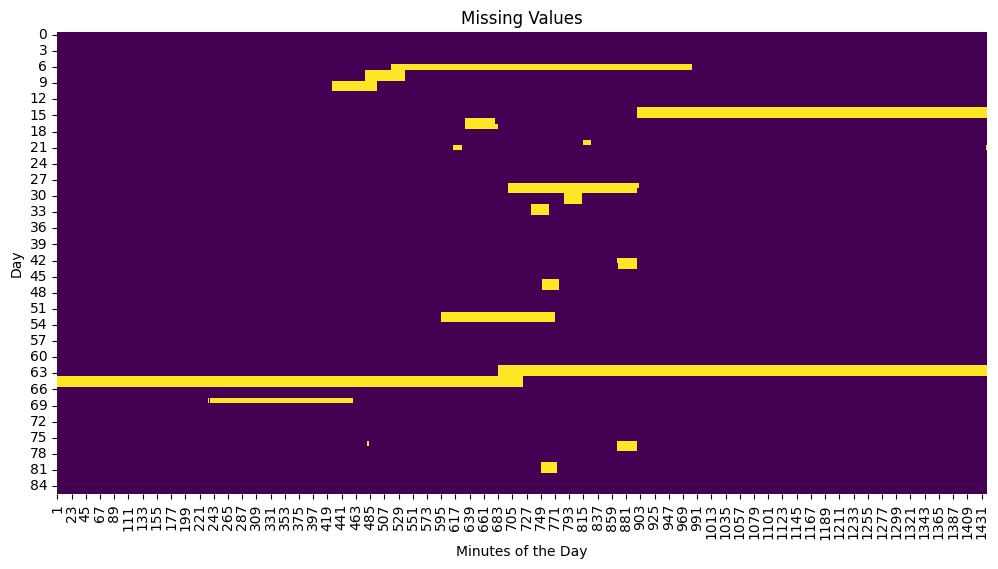

In [8]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Minutes of the Day')
plt.ylabel('Day')
plt.show()

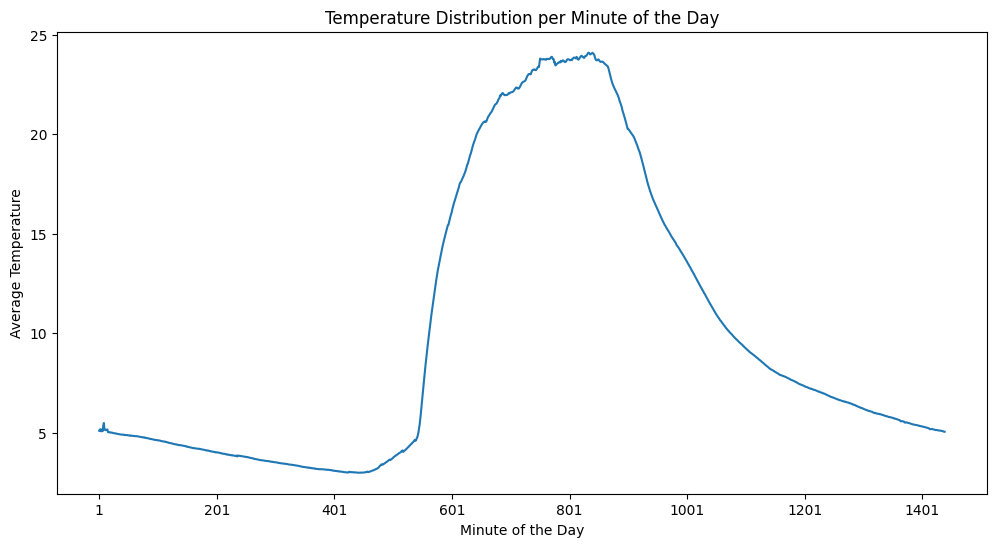

In [9]:
plt.figure(figsize=(12, 6))
df.mean(axis=0).plot()
plt.title('Temperature Distribution per Minute of the Day')
plt.xlabel('Minute of the Day')
plt.ylabel('Average Temperature')
plt.show()

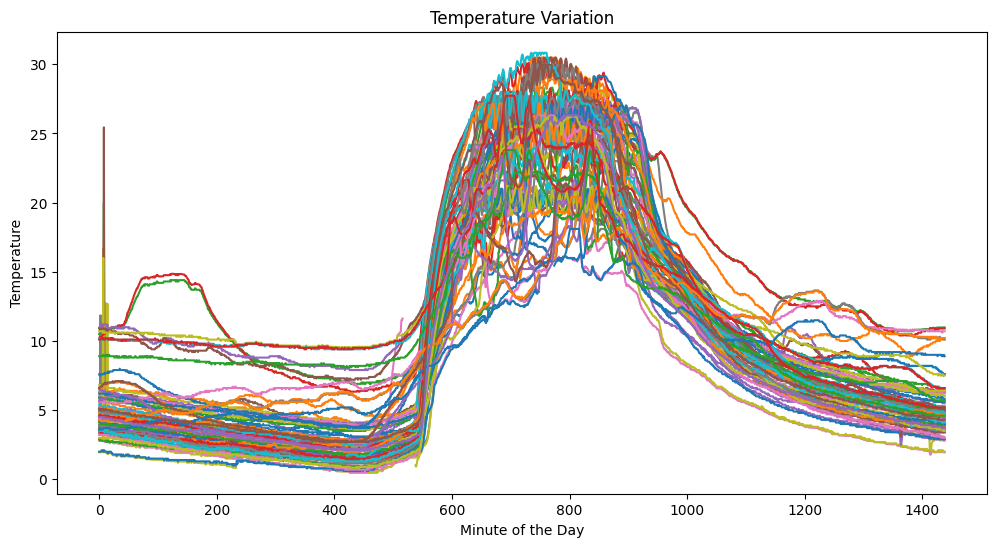

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.values.T)
plt.title('Temperature Variation')
plt.xlabel('Minute of the Day')
plt.ylabel('Temperature')
plt.show()

In [11]:
# Fill missing values using Autoencoders
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

In [12]:
# Preprocess the data
df_processed = imputer.fit_transform(df)
df_processed = scaler.fit_transform(df_processed)

In [13]:
autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(df.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(df.shape[1])
])

In [14]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               184320    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                5

In [15]:
autoencoder.compile(optimizer='adam', loss='mse')

In [16]:
autoencoder.fit(df_processed, df_processed, epochs=50, batch_size=32, verbose=0)

In [17]:
# Fill missing values using Autoencoder predictions
df_filled = autoencoder.predict(df_processed)
df_filled = scaler.inverse_transform(df_filled)

3/3 [==============================] - 0s 3ms/step


In [18]:
df_filled = pd.DataFrame(df_filled, columns=df.columns)

In [19]:
df_filled.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.781879,4.754981,4.862052,4.765814,4.771531,4.943455,4.870349,5.074991,5.378119,4.996727,...,4.488340,4.490355,4.429383,4.472353,4.460177,4.387539,4.458058,4.326360,4.490953,4.443099
1,5.691020,5.723019,5.777364,5.647106,5.670915,5.780373,5.790871,6.110737,6.051268,5.908291,...,5.259951,5.300532,5.276937,5.257275,5.228325,5.233856,5.249234,5.190280,5.286445,5.233043
2,4.266317,4.247338,4.450288,4.253876,4.191994,4.316485,4.237761,4.420074,4.756234,4.210997,...,4.769299,4.698245,4.742038,4.688040,4.628304,4.674669,4.679586,4.772585,4.637774,4.617560
3,5.139293,5.290756,5.172708,5.270577,5.153633,5.014270,5.091692,4.894164,5.544252,5.387576,...,5.674233,5.478782,5.394818,5.470167,5.429895,5.488595,5.457430,5.524486,5.407599,5.426318
4,5.141183,5.297345,5.191072,5.283410,5.159608,5.022120,5.109179,4.944461,5.577578,5.388142,...,5.681167,5.494523,5.422226,5.497649,5.448504,5.493035,5.458897,5.534294,5.421682,5.439529


In [20]:
missing_values_count = df_filled.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


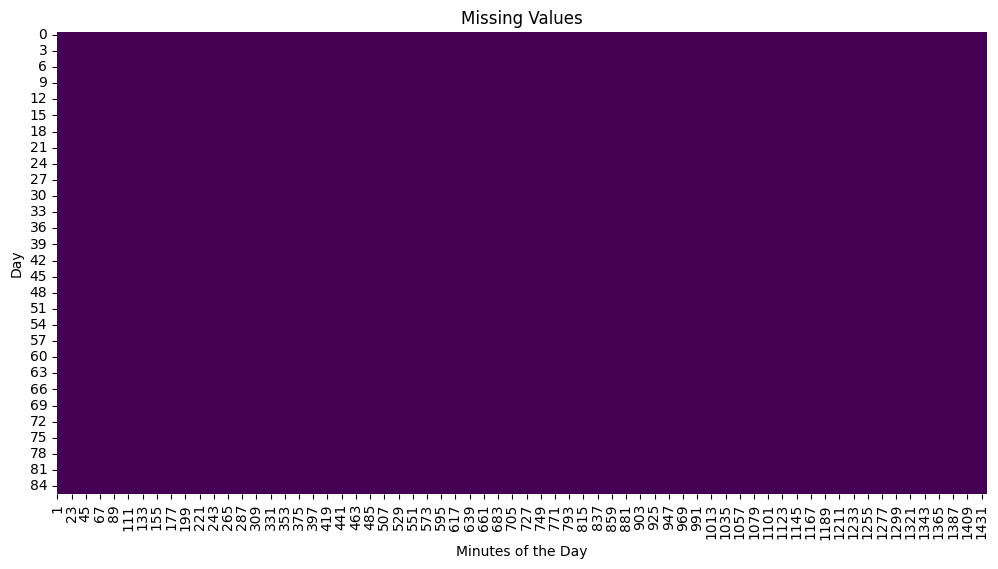

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_filled.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Minutes of the Day')
plt.ylabel('Day')
plt.show()

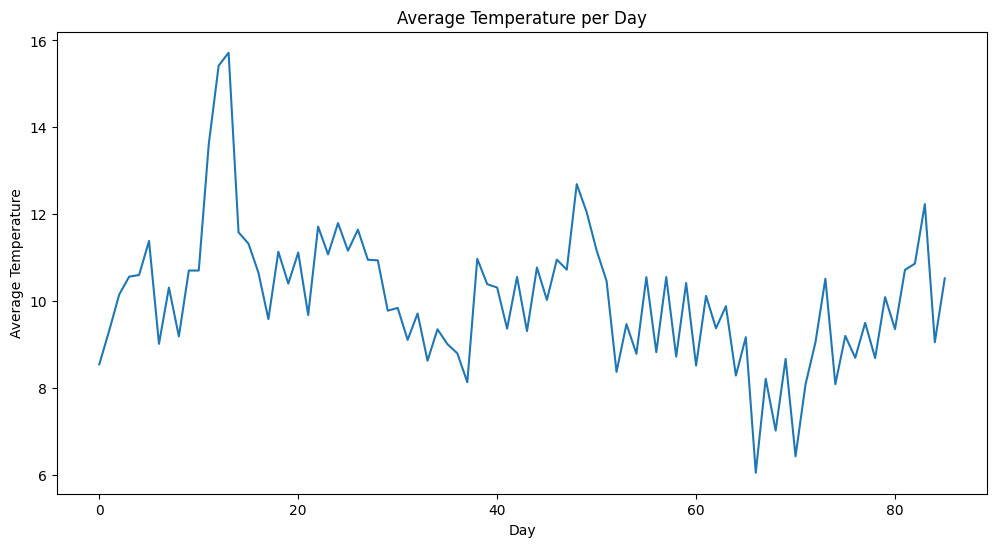

In [22]:
plt.figure(figsize=(12, 6))
df_filled.mean(axis=1).plot()
plt.title('Average Temperature per Day')
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.show()

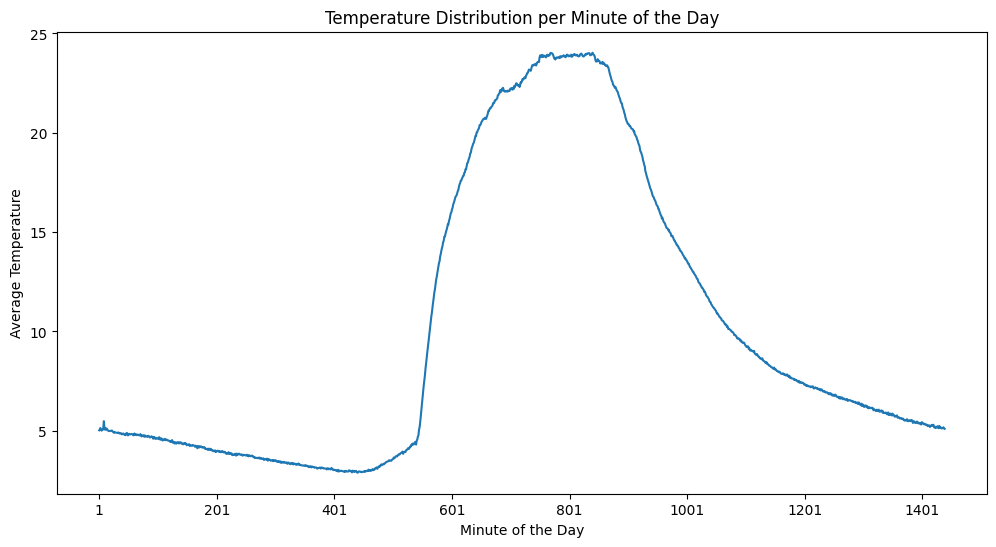

In [23]:
plt.figure(figsize=(12, 6))
df_filled.mean(axis=0).plot()
plt.title('Temperature Distribution per Minute of the Day')
plt.xlabel('Minute of the Day')
plt.ylabel('Average Temperature')
plt.show()

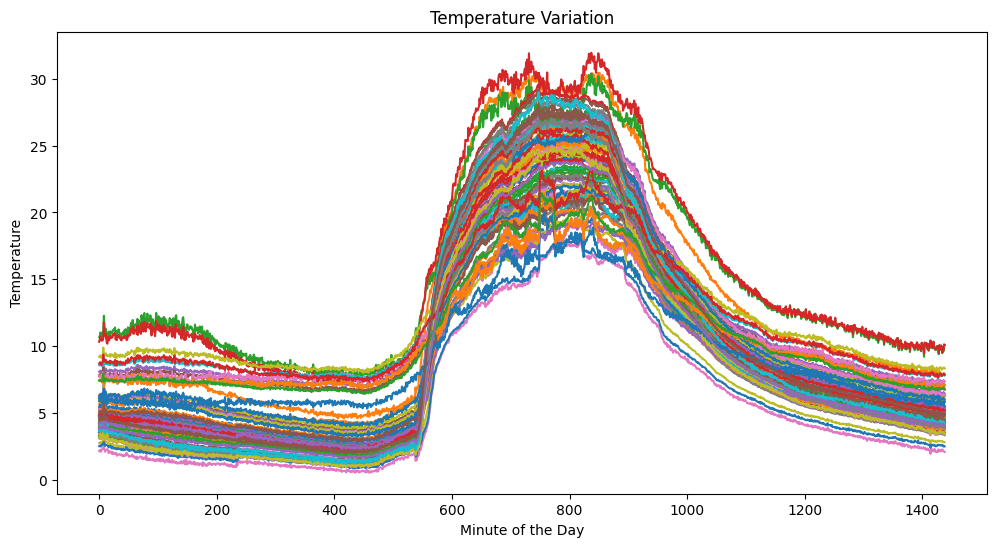

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_filled.values.T)
plt.title('Temperature Variation')
plt.xlabel('Minute of the Day')
plt.ylabel('Temperature')
plt.show()

In [25]:
# import pandas as pd
# from scipy.stats.mstats import winsorize
# lower_pct = 0.1 # Lower threshold percentile
# upper_pct =  0.01 # Upper threshold percentile
# #threshold can be adjusted according to requirement
# winsorized_df = df_filled.copy()

# # Apply winsorization
# for col in df_filled.columns:
#     winsorized_col = winsorize(df_filled[col], limits=(lower_pct/100, upper_pct/100))
#     winsorized_df[col] = winsorized_col
# df_filled=winsorized_df

In [26]:
# plt.figure(figsize=(12, 6))
# plt.plot(df_filled.values.T)
# plt.title('Temperature Variation')
# plt.xlabel('Minute of the Day')
# plt.ylabel('Temperature')
# plt.show()

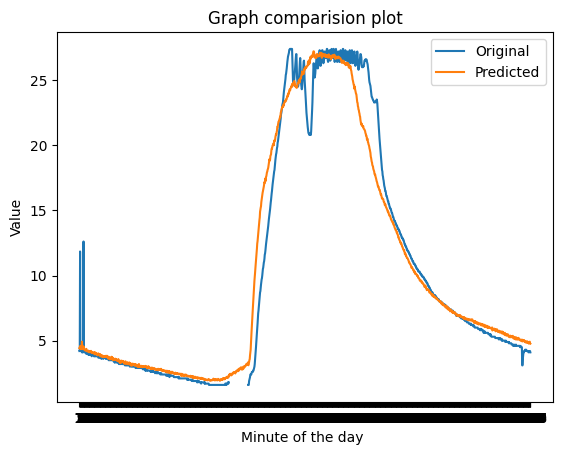

In [27]:
row1 = df.iloc[7, :]
row2 = df_filled.iloc[7, :]
fig, ax = plt.subplots()
ax.plot(row1, label='Original')
ax.plot(row2, label='Predicted')

ax.set_xlabel('Minute of the day ')
ax.set_ylabel('Value')

ax.set_title('Graph comparision plot')
ax.legend()
plt.show()

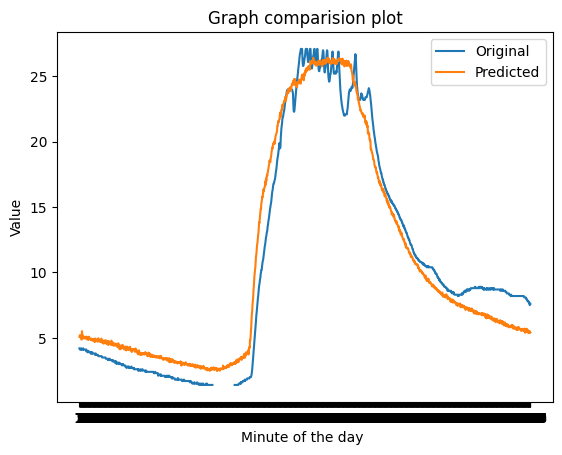

In [28]:
row1 = df.iloc[9, :]
row2 = df_filled.iloc[9, :]
fig, ax = plt.subplots()
ax.plot(row1, label='Original')
ax.plot(row2, label='Predicted')

ax.set_xlabel('Minute of the day ')
ax.set_ylabel('Value')

ax.set_title('Graph comparision plot')
ax.legend()
plt.show()

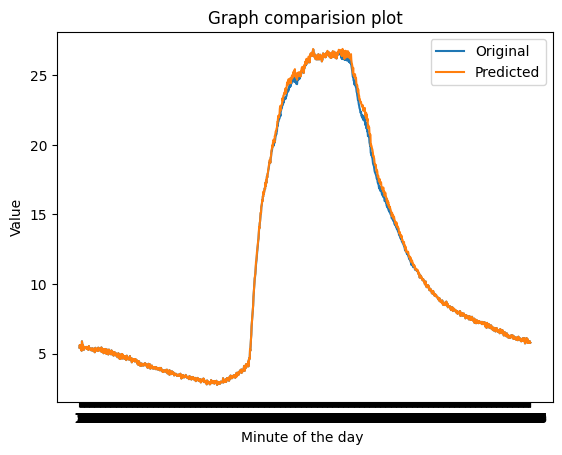

In [58]:
row1 = df.iloc[20, :]
row2 = df_filled.iloc[20, :]
fig, ax = plt.subplots()
ax.plot(row1, label='Original')
ax.plot(row2, label='Predicted')

ax.set_xlabel('Minute of the day ')
ax.set_ylabel('Value')

ax.set_title('Graph comparision plot')
ax.legend()
plt.show()

In [29]:
# Save the final completed dataset
df_filled.to_csv('completed_temperature_data_autoencoder.csv', index=False)


In [30]:
# Save the final completed dataset
df_filled.to_csv('completed_temperature_data_autoencoder.csv', index=False)


In [31]:
autoencoder.save_weights('autoencoder_weights.h5')

In [32]:
import os
current_dir = os.getcwd()
weights_path = os.path.join(current_dir, 'autoencoder_weights.h5')
autoencoder.save_weights(weights_path)

**Fault Detection:**

To detect faulty sensor readings, we set a threshold on the training data based on the reconstruction error. Any sensor readings with a reconstruction error above the threshold are considered anomalies or faults. The threshold can be determined using statistical methods or domain expertise.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [34]:
df = pd.read_csv('completed_temperature_data_autoencoder.csv')

In [35]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.781879,4.754981,4.862052,4.765814,4.771531,4.943455,4.870349,5.074991,5.378119,4.996727,...,4.488340,4.490355,4.429383,4.472353,4.460177,4.387539,4.458058,4.326360,4.490953,4.443098
1,5.691020,5.723019,5.777364,5.647106,5.670915,5.780373,5.790871,6.110737,6.051268,5.908291,...,5.259951,5.300532,5.276937,5.257275,5.228325,5.233856,5.249234,5.190280,5.286445,5.233043
2,4.266317,4.247338,4.450288,4.253876,4.191994,4.316485,4.237761,4.420075,4.756234,4.210997,...,4.769299,4.698245,4.742038,4.688040,4.628304,4.674669,4.679586,4.772585,4.637774,4.617560
3,5.139293,5.290756,5.172708,5.270577,5.153633,5.014270,5.091692,4.894164,5.544252,5.387576,...,5.674233,5.478782,5.394818,5.470167,5.429895,5.488594,5.457430,5.524486,5.407599,5.426318
4,5.141183,5.297345,5.191072,5.283410,5.159608,5.022120,5.109179,4.944461,5.577578,5.388142,...,5.681167,5.494523,5.422226,5.497649,5.448504,5.493035,5.458897,5.534294,5.421682,5.439529


In [36]:
missing_values_count = df.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


In [37]:
import pandas as pd
from scipy.stats.mstats import winsorize
lower_pct = 0 # Lower threshold percentile
upper_pct = 20  # Upper threshold percentile
winsorized_df = df.copy()

# Apply winsorization
for col in df.columns:
    winsorized_col = winsorize(df[col], limits=(lower_pct/100, upper_pct/100))
    winsorized_df[col] = winsorized_col
df=winsorized_df

In [38]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [39]:

# Preprocess the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [40]:

#Autoencoder model
input_dim = train_data_scaled.shape[1]
encoding_dim = 128
autoencoder = Sequential([
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(input_dim, activation='sigmoid')
])


In [41]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               184320    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 16)                144       
                                                                 
 dense_16 (Dense)            (None, 32)               

In [42]:
autoencoder.compile(optimizer='adam', loss='mse')


In [43]:
autoencoder.fit(train_data_scaled, train_data_scaled, epochs=50, batch_size=32, verbose=0)


In [44]:

predictions = autoencoder.predict(test_data_scaled)
mse = np.mean(np.power(test_data_scaled - predictions, 2), axis=1)

# Setting a threshold for anomaly detection
threshold = np.mean(mse) + np.std(mse)  # Adjust the threshold as desired
anomalies = test_data[mse > threshold]


1/1 [==============================] - 0s 87ms/step


In [45]:
# df = pd.read_csv('combined data_temp.csv')
# missing_values_count = df.isna().sum().sum()
# print(f"Number of missing values: {missing_values_count}")

In [46]:
# df.shape[1]

In [47]:

# # Load the trained Autoencoder model
# autoencoder = Sequential([
#     Dense(128, activation='relu', input_shape=(df.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(8, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(df.shape[1])
# ])
# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.load_weights('autoencoder_weights.h5')


In [48]:
# imputer = SimpleImputer(strategy='mean')
# scaler = MinMaxScaler()


In [49]:

# data_processed = imputer.fit_transform(df)
# data_processed = scaler.fit_transform(data_processed)


In [50]:
# #

# data_filled = autoencoder.predict(data_processed)
# data_filled = scaler.inverse_transform(data_filled)


In [51]:

# # Create a DataFrame with filled values
# df_filled = pd.DataFrame(data_filled, columns=df.columns)

# # Save the completed data to a CSV file
# # df_filled.to_csv('completed_external_data.csv', index=False)


In [52]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(12, 6))
# sns.heatmap(df_filled.isna(), cmap='viridis', cbar=False)
# plt.title('Missing Values')
# plt.xlabel('Minutes of the Day')
# plt.ylabel('Day')
# plt.show()

In [53]:
# plt.figure(figsize=(12, 6))
# plt.plot(df_filled.values.T)

# plt.title('Temperature Variation')
# plt.xlabel('Minute of the Day')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()

**TESTING ON EXTERNAL DATA**

The external data is a part of the completed dataset along with some of the anomalous data points to ensure that our fault detection model works perfectly.

In [54]:
external_data = pd.read_csv('combined data_temp.csv')
external_data_normalized = scaler.transform(external_data)
external_data_predicted = autoencoder.predict(external_data_normalized)
external_data_errors = np.mean(np.square(external_data_predicted - external_data_normalized), axis=1)
anomalies = external_data[external_data_errors > threshold]

1/1 [==============================] - 0s 21ms/step


In [55]:
external_data.head(12)

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.419824,4.334443,4.313932,4.406659,4.344093,4.274795,4.391737,4.334283,4.208321,4.317139,...,4.024810,4.039134,4.077407,4.042704,4.025978,4.056233,4.067327,4.055597,4.063933,3.957667
1,5.646442,5.593498,5.565805,5.578524,5.628672,5.446203,5.712646,5.599183,5.415498,5.678457,...,4.648140,4.556548,4.664277,4.582540,4.531133,4.599082,4.639854,4.593104,4.604262,4.510507
2,3.721280,3.696202,3.737554,3.787323,3.680382,3.764121,3.750306,3.654842,3.582559,3.615309,...,3.786299,3.851422,3.883274,3.846254,3.822001,3.874617,3.889608,3.846623,3.874284,3.767988
3,5.625186,5.573153,5.556087,5.558602,5.606365,5.434977,5.682046,5.581068,5.403330,5.653812,...,4.639203,4.548917,4.650751,4.573523,4.524634,4.590561,4.628302,4.585205,4.591919,4.501487
4,4.445258,4.363031,4.360546,4.422179,4.362713,4.320437,4.393506,4.369835,4.252377,4.336823,...,4.040668,4.051697,4.074810,4.053006,4.041180,4.071085,4.068252,4.068074,4.065162,3.965094
5,5.442263,5.397669,5.376929,5.290732,5.343660,5.284220,5.330100,5.348016,5.255394,5.293747,...,5.661893,5.576331,5.661964,5.542659,5.612784,5.533547,5.526508,5.529441,5.575152,5.590327
6,4.073938,4.090978,4.056773,4.097732,4.150121,4.103541,4.112323,4.059176,4.112594,4.058521,...,4.432647,4.556312,4.406069,4.468807,4.505755,4.542013,4.340760,4.475057,4.489388,4.568392
7,6.437045,6.489439,6.409805,6.310455,6.135044,6.250726,6.343376,6.411976,6.199130,6.231704,...,6.354556,6.123139,6.386438,6.139655,6.248983,6.161677,6.239481,6.194244,6.195371,6.152344
8,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
9,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


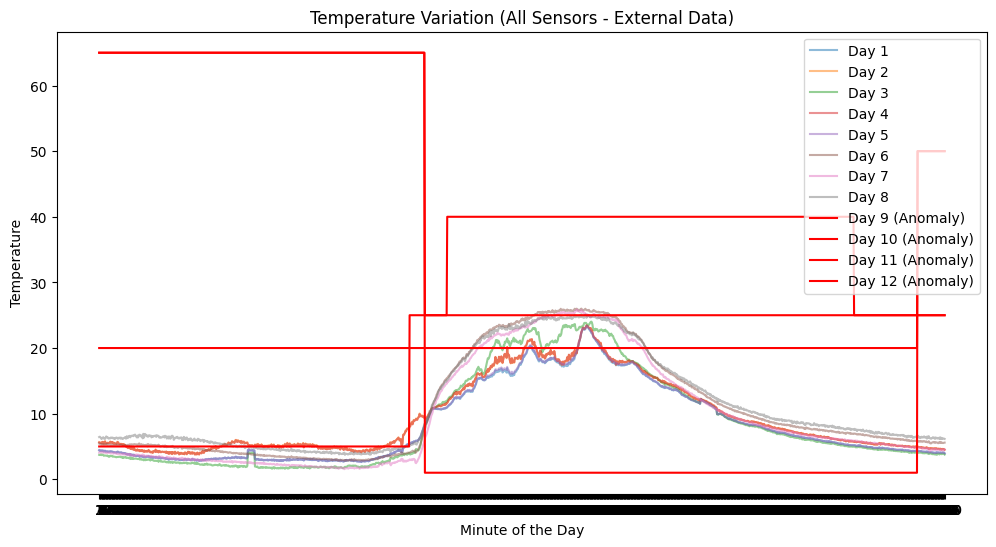

In [56]:
plt.figure(figsize=(12, 6))
for row in range(external_data.shape[0]):
    if row in anomalies.index:
        plt.plot(external_data.iloc[row, :], label=f"Day {row+1} (Anomaly)", color='r')
    else:
        plt.plot(external_data.iloc[row, :], label=f"Day {row+1}", alpha=0.5)
plt.title('Temperature Variation (All Sensors - External Data)')
plt.xlabel('Minute of the Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

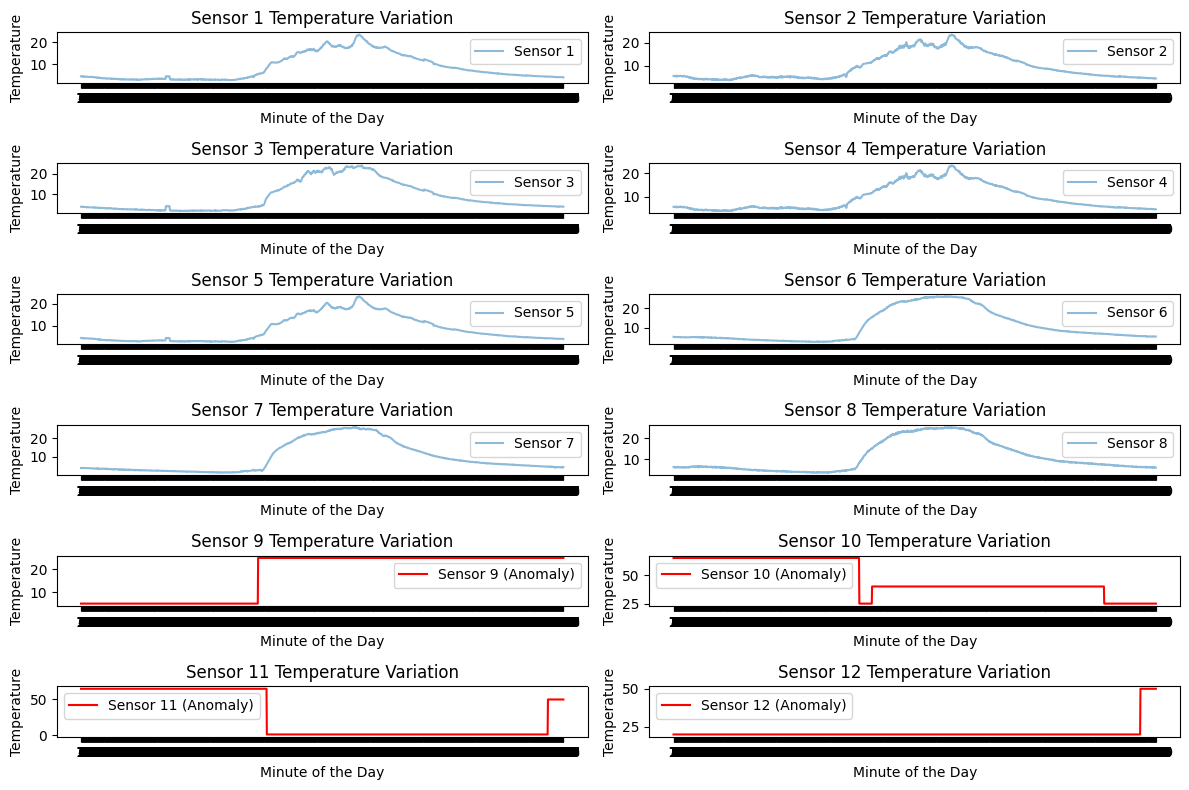

In [57]:
num_sensors = external_data.shape[0]
num_cols = min(2, num_sensors)
num_rows = (num_sensors + num_cols - 1) // num_cols

# Plotting temperature variation for each sensor individually with anomalies highlighted
plt.figure(figsize=(12, 8))
for row in range(num_sensors):
    plt.subplot(num_rows, num_cols, row+1)
    if row in anomalies.index:
        plt.plot(external_data.iloc[row, :], label=f"Sensor {row+1} (Anomaly)", color='r')
    else:
        plt.plot(external_data.iloc[row, :], label=f"Sensor {row+1}", alpha=0.5)
    plt.title(f"Sensor {row+1} Temperature Variation")
    plt.xlabel('Minute of the Day')
    plt.ylabel('Temperature')
    plt.legend()
plt.tight_layout()
plt.show()
